## Math 157: Intro to Mathematical Software
## UC San Diego, winter 2018

## Homework 4: due February 9, 2018

Please enter all answers within this notebook unless otherwise specified. As usual, don't forget to cite sources and collaborators.

Through this problem set, use the SageMath 8.1 kernel.

### Problem 1: QR codes

Grading criterion: correctness of code and output.

1a. The following image is the file "qr.gif" in this folder: ![qr.gif](qr.gif). Using the command `scipy.misc.imread`, convert this QR code into the underlying 0-1 matrix that it represents (black = 0, white = 1). You might want to read the [Scipy Lectures section on image processing](http://www.scipy-lectures.org/advanced/image_processing/) for some context on image processing.




In [7]:
from scipy import misc
qr=misc.imread('qr.gif', mode='L') # This is a good mode to use for simple black and white images like this one
for i in range(100):
    for j in range(100):
        qr[i][j]=1-qr[i][j]/255 # Turn the 255s to 0 and the 0s to 1
newqr=matrix(qr)

1b. Using the command `matrix_plot`, convert your answer for part (a) back into a QR code. Your answer should be legible to a standard QR code reader (e.g., on your phone).

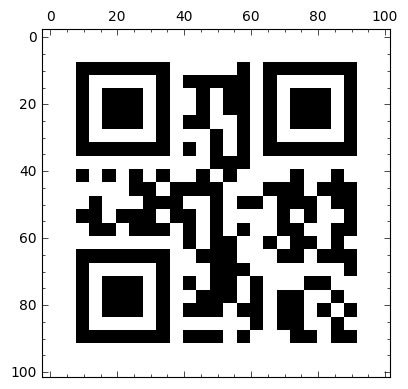

In [8]:
matrix_plot(newqr)

### Problem 2: Timing

Grading criterion: correctness of code.

2a. Write a straightforward Python function (that is, directly implement the definition without using any Sage or NumPy shortcuts) to compute the standard deviation of a list of numbers.

In [10]:
def f(v):
    avg=sum(v)/len(v) # compute average of the list
    var_sq=0
    for x in v: # compute the square of the varience, term by term
        var_sq+= (x-avg)^2/len(v)
    return(var_sq^.5) # return the variance


f([2,4,4,4,5,5,7,9])

2.00000000000000

2b. Using `timeit`, compare the speed of your program when given as input `v = range(1000)`,  `v = range(10000)` and `v = range(100000)` with the built-in functions provided by the following systems:
- numpy;
- R (use `r.???` to access R functions);
- `stats.TimeSeries`.

In [13]:
import numpy 

print('v=range(1000)')
timeit('f(range(1000))') 
timeit('numpy.std(range(1000))') 
timeit('r.sd(r.seq(1,1000))')
timeit('stats.TimeSeries.standard_deviation(finance.TimeSeries(range(1000)))')
print('v=range(10000)')
timeit('f(range(10000))') 
timeit('numpy.std(range(10000))') 
timeit('r.sd(r.seq(1,10000))')
timeit('stats.TimeSeries.standard_deviation(finance.TimeSeries(range(10000)))')
print('v=range(100000)')
timeit('f(range(100000))') 
timeit('numpy.std(range(100000))') 
timeit('r.sd(r.seq(1,100000))')
timeit('stats.TimeSeries.standard_deviation(finance.TimeSeries(range(100000)))')

v=range(1000)


125 loops, best of 3: 1.86 ms per loop


625 loops, best of 3: 101 µs per loop


25 loops, best of 3: 11.7 ms per loop
625 loops, best of 3: 32.4 µs per loop
v=range(10000)


25 loops, best of 3: 19.5 ms per loop


625 loops, best of 3: 709 µs per loop


25 loops, best of 3: 14.4 ms per loop


625 loops, best of 3: 314 µs per loop
v=range(100000)


5 loops, best of 3: 205 ms per loop


25 loops, best of 3: 7.92 ms per loop


25 loops, best of 3: 15.8 ms per loop
125 loops, best of 3: 4.1 ms per loop


### Problem 3: Playing cards

Grading criterion: correctness of code and output.

Overall hint: you may want to read this [tutorial](https://doc.sagemath.org/html/en/reference/combinat/sage/combinat/tutorial.html) which solves an easier version of this problem.

3a. Form a "deck of playing cards" by making a list of 52 tuples, each of which is an ordered pair whose first member is one of the 13 possible ranks (A,2,3,4,5,6,7,8,9,T,J,Q,K) and whose second member is one of the 4 possible suits (C,D,H,S).

In [63]:
Suits = Set(['H', 'D', 'S', 'C'])
Values = Set(['A', 2,3,4,5,6,7,8,9,10, "J", "Q", "K"])
Cards = list(cartesian_product([Values, Suits]))


3b. A *poker hand* consists of five distinct cards (order not important). Construct an iterator (not a list) that enumerates the possible poker hands from your deck.

In [64]:
hands = (Set(Cards[i] for i in indices) for indices in Subsets(range(52), 5))


3c. Write a function that, given a poker hand, returns the classification of this hand according to the [Wikipedia list of poker hands](https://en.wikipedia.org/wiki/List_of_poker_hands).

In [65]:
def flush_check(hand):
    suits=Set(card[1] for card in hand) # Looks at the set of all suits in the hand (ignoring repeats)
    if len(suits)==1: # Flushes have exactly one suit
        return True
    else:
        return False
        
def straight_check(hand):
    values=Set(card[0] for card in hand) # Looks at the sets of all values in the hand (order doesn't matter and straights have no repeats)
    value_order=['A']+range(2,11)+['J', 'Q', 'K', 'A']
    straights=[Set(value_order[i:i+5]) for i in range(len(value_order)-4)] # Makes a list of all the sets that correspond to straights
    if values in straights:
        return True
    else:
        return False
    
def classify(hand):
    flush=flush_check(hand)
    straight=straight_check(hand)
    vals=[card[0] for card in hand] # Looks at the list of values in the hand (repeats matter, so we can't use a set here)
    val_set=Set(vals) # Turning this into a set tells us which values appear and now ignores repeats
    val_freq=sorted([vals.count(val) for val in val_set]) # Given a value in the hand, vals.count(val) tells how many cards in the hand have this value. val_freq is the list of all such values. This is the information we need to distinguish between things like full houses and two pair.
    if flush and straight: # Running through all the possible hand types in order. It's important to check for a straight flush before checking for a straight!
        return 1
    elif val_freq==[1,4]: # Hands with four of a kind must have exactly this value frequency.
        return 2
    elif val_freq==[2,3]:
        return 3
    elif flush:
        return 4
    elif straight:
        return 5
    elif val_freq==[1,1,3]:
        return 6
    elif val_freq==[1,2,2]:
        return 7
    elif val_freq==[1,1,1,2]: # Hands with one pair (and nothing else) must have exactly this value frequency, a pair and three distinct other values.
        return 8
    else: 
        return 9

    

3d. Using your answer to 3c, compute the probability that a poker hand, chosen randomly from a deck, is of any particular type.

In [66]:
hand_totals={} # Making a dictionary with the hand types
for i in range(1,10):
    hand_totals[i]=0 # Initially there are no hands of each type
  

counter=0
for hand in hands: # This takes 30 minutes to run
    counter+=1
    if counter%100000==0: # Prints out progress reports
        print counter
    hand_totals[classify(hand)]+=1 # For each hand, classify and update the dictionary
    
hand_totals
    

100000


200000


300000


400000


500000


600000


700000


800000


900000


1000000


1100000


1200000


1300000


1400000


1500000


1600000


1700000


1800000


1900000


2000000


2100000


2200000


2300000


2400000


2500000


{1: 40,
 2: 624,
 3: 3744,
 4: 5108,
 5: 10200,
 6: 54912,
 7: 123552,
 8: 1098240,
 9: 1302540}

In [67]:
hand_nums=sum(hand_totals[i] for i in hand_totals) 
for i in hand_totals:
    hand_totals[i]=(hand_totals[i]/hand_nums, float(hand_totals[i]/hand_nums)) # Showing hand frequencies both in fraction and float form
hand_totals

{1: (1/64974, 1.5390771693292702e-05),
 2: (1/4165, 0.00024009603841536616),
 3: (6/4165, 0.0014405762304921968),
 4: (1277/649740, 0.001965401545233478),
 5: (5/1274, 0.003924646781789639),
 6: (88/4165, 0.02112845138055222),
 7: (198/4165, 0.0475390156062425),
 8: (352/833, 0.4225690276110444),
 9: (1277/2548, 0.5011773940345369)}

### Problem 4: The weak Goldbach problem

Grading criterion: correctness of code and thoroughness of analysis.

The notorious *Goldbach problem* is to prove that every even integer greater than 2 can be written as the sum of two primes. A slightly easier problem (which would follow from the original Goldbach problem) is to prove that every odd integer greater than 5 can be written as the sum of three primes. This was shown for *sufficiently large* integers by Vinogradov in 1937; the gap between "sufficiently large" and "all" was closed by Helfgott in 2013. (This involves serious use of interval arithmetic, but never mind for now.)

4a. Define a function that, given an odd positive integer $n$, returns a list of all of the ways to write $n$ as a sum of three odd primes (up to permutations) by doing a list comprehension over all partitions of $n$ into three positive integers, testing whether each summand is prime.

In [16]:
def weak_goldbach1(n):
    if n%2==0:
        return 'n must be odd'
    plist=[lis for lis in Partitions(n, length=3) if all([is_prime(i) for i in lis])] # Using an iterator because there are lots of partitions
    return plist

4b. Define another function that does the same combination, but this time by doing a list comprehension over all combinations of three elements of the set of primes less than $n$, testing whether each triple adds up to $n$.

In [37]:
import itertools

def weak_goldbach2(n):
    if n%2==0:
        return 'n must be odd'
    plist=[s for s in itertools.combinations_with_replacement(primes(1,n), 3) if sum(s)==n] # Counts number of ways to write n as three distinct primes

    return plist


4c. To confirm that the two methods agree, count the number of solutions returned by 4a and 4b for $n=10^k+1$ for $k=1,2,3,4,5$.

In [38]:
for k in range(1,5):
    print(len(weak_goldbach1(10^k+1)), len(weak_goldbach2(10^k+1)))


(2, 2)
(38, 38)


(1095, 1095)


(42615, 42615)


4d. Using the result of 4c, make a guess about how the number of solutions behaves for large $n$. You may collect additional data if that helps.

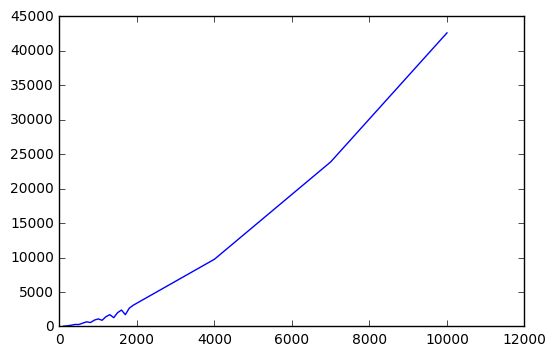

In [44]:
xlis=[]
ylis=[]
for i in range(1,20):
    xlis+=[100*i+1]
    ylis+=[len(weak_goldbach1(100*i+1))]
    
xlis+=[4001, 7001]
ylis+=[len(weak_goldbach1(4001)), len(weak_goldbach1(7001))]
xlis+=[10^4+1]
ylis+=[42615]
    
import matplotlib.pyplot as plt
plt.plot(xlis, ylis)
plt.show()

The number of solutions appears to be growing slightly faster than linearly

### Problem 5: A threshold property of random graphs

Grading criterion: correctness of code and thoroughness of analysis.

5a. Let us say that a graph is *mostly connected* if there is a single connected component containing at least 75% of the vertices. Write a function to test whether a given graph has this property.

In [45]:
def Gcomp(graph, compsize=.75):
    maxcomp=0
    ccomps=graph.connected_components() # Get list of connected components of the graph
    for comp in ccomps: # Iterates through the components to find the largest one
        if len(comp)>maxcomp:
            maxcomp=len(comp) 
    if maxcomp>=order(graph)*compsize: # If the largest component has over 75% of the vertices, return True
        return True
    return False


5b. Let $G(n, p)$ be a graph on $n$ vertices in which each possible edge is included with probability $p$. For $n = 100, 500, 1000$, plot the probability that $G(n,p)$ is mostly connected (based on a sample of 100 random graphs) as a function of $p$.

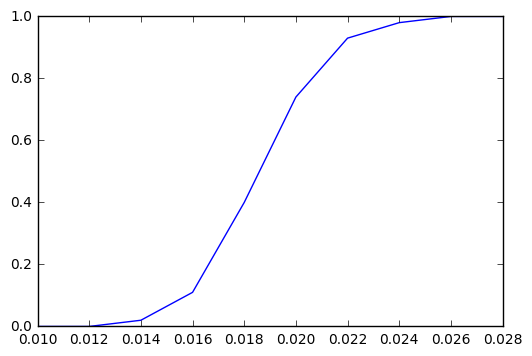

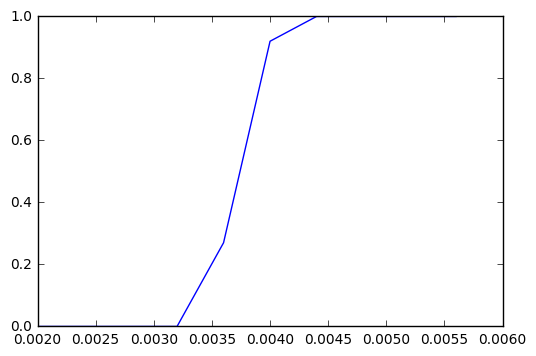

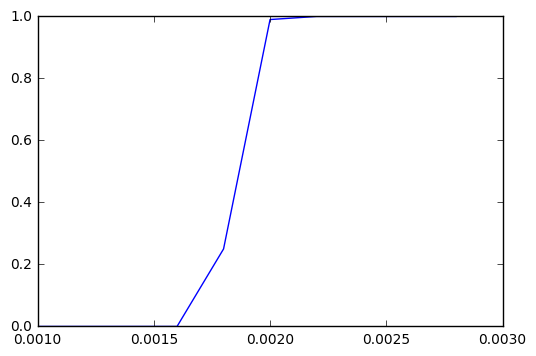

(None, None, None)

In [52]:
import matplotlib.pyplot as plt

def Gprob(vert_num, edge_prob, trials=100):
    mcon=0 # Make a counter
    for i in range(trials):
        graph=graphs.RandomGNP(vert_num, edge_prob) # Make a random graph in G(n,p)
        if Gcomp(graph): # If it's mostly connected, add one to the counter
            mcon+=1
    return mcon/trials # Return the probability that it's mostly connected

def Gplot(vert_num):
    plis=[] # Make list for the x-axis, these are the p that we will check
    clis=[] # Make list for the y-axis
    for i in range(10):
        p = 1/vert_num+i/(5*vert_num) # I chose these p values to make the graph interesting using my answer for 5d
        plis += [p]
        clis += [Gprob(vert_num, p)] # For each p value, compute the probability that a graph in G(n,p) is mostly connected
    plis, clis
    plt.plot(plis, clis)
    plt.show()
                       
Gplot(100), Gplot(500), Gplot(1000)

5c. Write a function that, for a given $n$, finds a value of $p$ for which the probability (based on a sample of 100 random graphs) that $G(n,p)$ is mostly connected is between 25% and 75%.

In [57]:
def connprob(v_num, sample=100):
    pguess= .5 # Starting guess for binary search
    perr= .25 # Starting error term
    prob=0
    while (.25>prob) or (.75< prob): # Run until we find a good value of p
        prob=Gprob(v_num, pguess, sample)
        if prob>.75: # If our p gives a probability that's too big, make it smaller
            pguess = pguess-perr
            perr = perr*.5
        if prob<.25: # Otherwise, make it bigger
            pguess = pguess+perr
            perr = perr*.5
            
    return pguess


5d. Plot the values of $p$ you computed in (b) as a function of $n$, going up to at least $n=1000$ with at least 10 sample points. Then make a guess as to how these values depend on $n$.

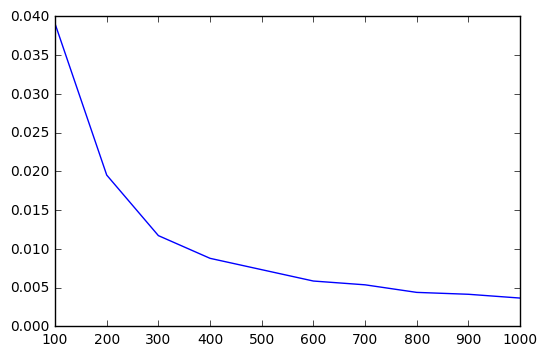

In [59]:
vlis=[]
plis=[]

for i in range(1, 11):
    vlis+= [100*i]
    prob=connprob(50*i)
    plis+= [prob]
    
plt.plot(vlis,plis)
plt.show()

The value p appears to be going to 0 as n get large. More precisely, it appears that $p\sim 2/n$.

### Problem 6: Spectral gaps of graphs

Grading criterion: correctness of code and thoroughness of analysis.

6a. Let $G$ be a graph on $n$ vertices which is $k$-regular (each vertex has $k$ neighbors). Let $A$ be the adjacency matrix of $G$. Explain what the Perron-Frobenius theorem implies about the eigenvalues of $A$.

The eigenvalues are real as $A$ is symmetric and the Perron-Frobenius theorem implies that the largest one is unique and bounded above by $k$. As $k$ is an eigenvalue (the corresponding eigenvector has all 1s), the largest eigenvalue must be $k$. See [Here](https://en.wikipedia.org/wiki/Adjacency_matrix#Properties) for details.

6b. Let $G_n$ be the graph with vertices $\{0,\dots,n-1\}$ in which $x$ is adjacent to $y$ if and only if $x - y$ is congruent to one of $\pm 1, \dots, \pm k$ modulo $n$. Write a function that constructs the adjacency matrix of $G_n$ and returns the norm of its second-largest eigenvalue.

In [22]:
import numpy
from numpy import linalg # numpy is faster at computing eigenvalues

def strongly_reg_eval(k,n):
    vertices={} # Start with empty dictionary
    for i in range(n): # Add vertices one at a time
        vertices[mod(i,n)]=[] 
        for j in range(k): # Once a vertex is added, create list of neighbors
            vertices[mod(i,n)]+=[mod(i-j-1,n),mod(i+j+1,n)] # Working mod n so we can just subtract vertex labels to see if they are adjacent
    G=Graph(vertices) # Make the graph from the vertices
    M=G.adjacency_matrix() # Compute adjacency matrix    
    numpyM=M.numpy() # Move to numpy to compute eigenvalues
    evals=linalg.eigvalsh(numpyM)
    return evals[-2] # Return the second largest element

6c. Write a function that constructs the adjacency matrix of a random $2k$-regular graph on $n$ vertices and returns the norm of its second-largest eigenvalue.

In [21]:
def random_reg_eval(k,n):
    G=graphs.RandomRegular(2*k,n) # Create random graph 
    M=G.adjacency_matrix() # Compute adjacency matrix 
    numpyM=M.numpy()
    evals=linalg.eigvalsh(numpyM) 
    return evals[-2] # Return the second largest element

6d. For $k=3,4,5$, make a plot that compares the answers of 6b and 6c for $n$ from 100 to 1000 (with at least 10 sample points).

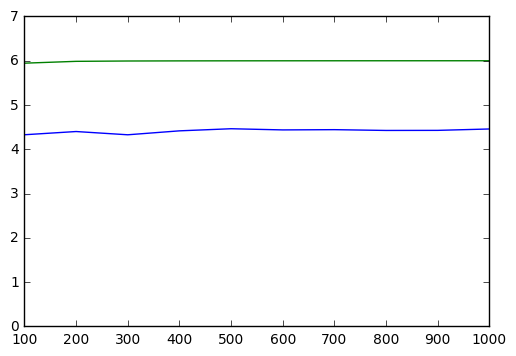

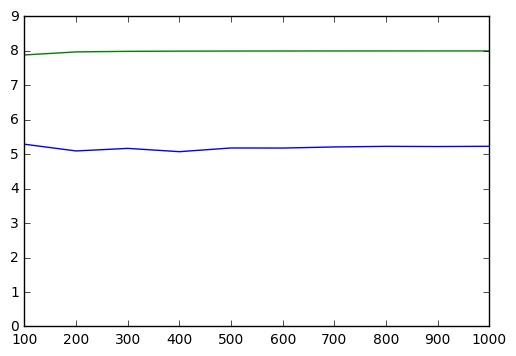

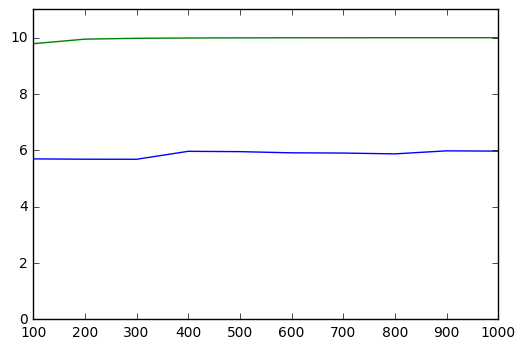

In [23]:
import matplotlib.pyplot as plt

def graph_comparison(k):
    nvals=[] # Make list for x-axis
    rand_evals=[] # Make list for eigenvalues of random regular graphs
    strong_evals=[] # Make list for eigenvalues of strongly regular graphs
    for n in range(100,1100, 100): # Iterate over the x-axis list and compute the corresponding eigenvalues
        nvals+=[n]
        rand_evals+=[random_reg_eval(k,n)]
        strong_evals+=[strongly_reg_eval(k,n)]
    plt.plot(nvals, rand_evals) # Plot both on the same graph
    plt.plot(nvals, strong_evals)
    axes = plt.gca()
    axes.set_ylim([0,2*k+1]) # Set y-axis to be reasonable
    plt.show() 
    
graph_comparison(3)
graph_comparison(4)
graph_comparison(5)

6e. In as much detail as possible, interpret your answer to 6d in terms of mixing of random walks.

Let $G$ be a $k$-regular graph and pick a vertex $v$. If we start at $v$, choose a random neighbor, move to it, and repeat this process $m$ times, we get a random walk of length $m$. We can then ask for the probability distribution: where do we expect to be after $m$ moves? As $m$ goes to infinity, this distribution will become regular: each vertex will be equally likely. The closer the second eigenvalue is to the largest eigenvalue, the longer it will take this distribution to converge to the regular one. We conclude that the special graphs constructed in part 6b will take much longer to mix than a general random regular graph of the same size.  

Sources: http://www.cs.cornell.edu/courses/cs6850/2017sp/random-walks.pdf, https://en.wikipedia.org/wiki/Expander_graph#Spectral_expansion